In [64]:
INPUT_FOLDER = 'datasets/bernard'
OUTPUT_PATH = 'datasets/bernard_dataset.pickle'

In [65]:
import re
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [66]:
import os

images_path = []
labels_path = []

dir = sorted_aphanumeric(os.listdir(INPUT_FOLDER))
for file in dir:
    filepath = os.path.join(INPUT_FOLDER, file)    
    if file.endswith(".jpg"):
        images_path.append(filepath)
    elif file.endswith(".dat"):
        labels_path.append(filepath)
    else:
        raise Exception('Unknown extention')

In [67]:
def load_grid_from_dat(dat_file):
    digits = []
    with open(dat_file, mode='r') as f:
        for line in f.readlines():       
            if '-' not in line:
                line = [l for l in line if l not in [' ', '|', '\n']]
                line = [int(l) if l != '.' else 0 for l in line]
                digits.append(line)
        
    return SudokuGrid(digits)

In [69]:
from skimage import io
from sudoku_solver.data import SudokuGrid

images = []
labels = []

for im_path, lab_path in zip(images_path, labels_path):
    img = io.imread(im_path)
    grid = load_grid_from_dat(lab_path)     
    
    images.append(img)
    labels.append(grid)

In [70]:
import pickle

bernard_dataset = {
    'images': images,
    'labels': labels
}

with open(OUTPUT_PATH, 'wb') as f:
    pickle.dump(bernard_dataset, f)

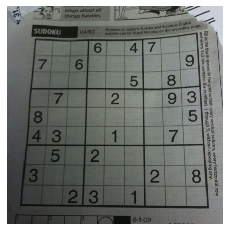

000|604|700
706|000|009
000|005|080
-----------
070|020|093
800|000|005
430|010|070
-----------
050|200|000
300|000|208
002|301|000



In [71]:
%matplotlib inline
from sudoku_solver.utils import plot_img

plot_img(images[0])
print(labels[0])

In [74]:
with open(OUTPUT_PATH, 'rb') as f:
    data = pickle.load(f)

X, y = data['images'], data['labels']

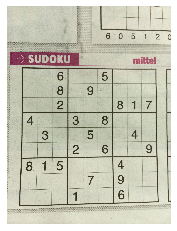

006|005|000
008|090|000
002|000|817
-----------
400|308|000
030|050|040
000|206|009
-----------
815|000|400
000|070|900
000|100|600



In [77]:
plot_img(X[11])
print(y[11])